In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastai.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
horizon, lookback = 7, 35    

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3, max_std=5)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


In [ ]:
items = dummy_data_generator(60, 10, nrows=300)
data = TSDataLoaders.from_items(items,horizon = horizon, lookback = lookback, step=5, valid_pct=.2)

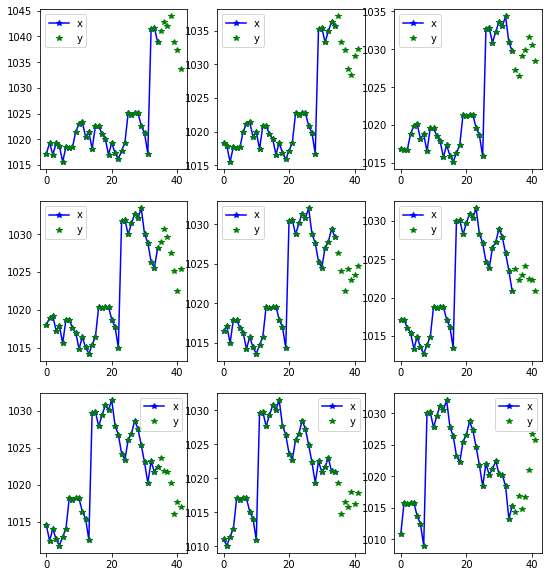

In [ ]:
data.show_batch()

In [ ]:
from fastseq.nbeats.callbacks import *
learn = nbeats_learner(data, cbs=ClipLoss(20), opt_func=Adam, layers= [2048, 2048] )   

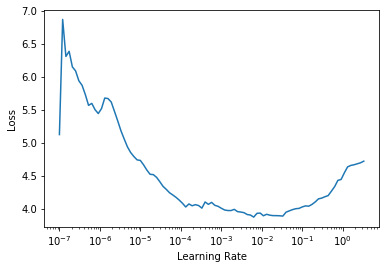

In [ ]:
from fastai.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,time
0,3.251859,4.300817,2678572.000000,1.292251,1.723178,nan,nan,01:08
1,3.288245,4.291528,2678572.000000,1.221225,1.928795,nan,nan,01:06
2,3.253186,4.305524,2678572.000000,1.258665,1.848397,nan,nan,01:06
3,3.171347,4.249976,2678572.000000,1.251155,1.838728,nan,nan,01:05
4,3.221140,4.343940,2678572.000000,1.219682,1.950669,nan,nan,01:06
5,3.403227,4.436116,2678572.000000,1.212156,2.190443,nan,nan,01:06
6,3.272718,4.500582,2678572.000000,1.249716,2.135125,nan,nan,01:05
7,3.267368,4.380112,2678572.000000,1.130886,2.145581,nan,nan,01:06
8,3.245132,4.358323,2678572.000000,1.213850,2.081522,nan,nan,01:07
9,3.752972,4.863714,2678572.000000,1.402567,2.426826,nan,nan,01:05


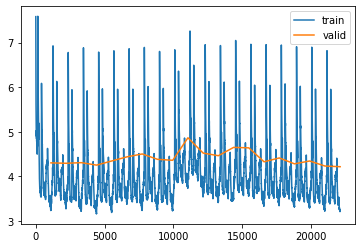

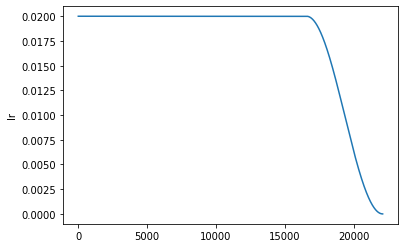

In [ ]:
learn.fit_flat_cos(20, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

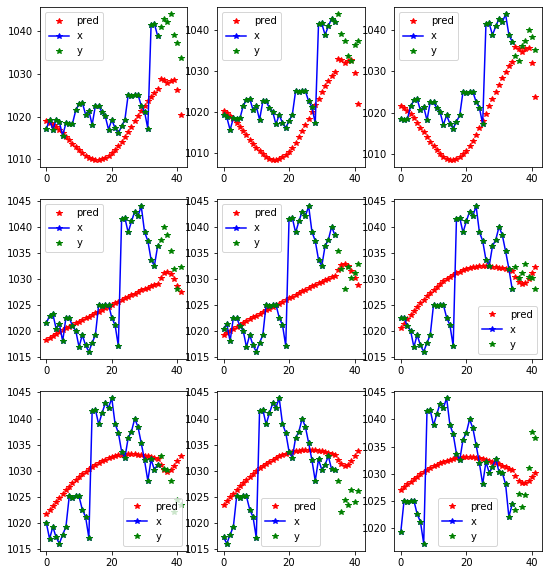

In [ ]:
learn.show_results(0)

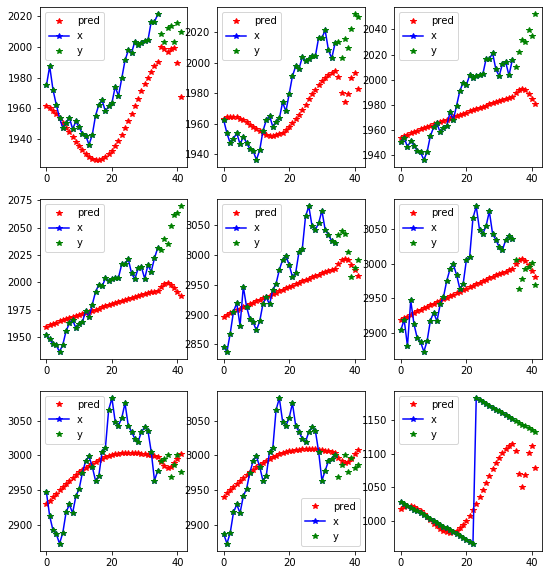

In [ ]:
learn.show_results(1)

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,time
0,3.243420,4.223668,2678572.000000,1.209187,2.341816,nan,nan,01:04
1,3.239618,4.215517,2678572.000000,1.216690,2.345979,nan,nan,01:04
2,3.238956,4.210948,2678572.000000,1.214957,2.351088,nan,nan,01:04
3,3.236582,4.210618,2678572.000000,1.211720,2.340937,nan,nan,01:04
4,3.232593,4.208676,2678572.000000,1.213249,2.341814,nan,nan,01:04


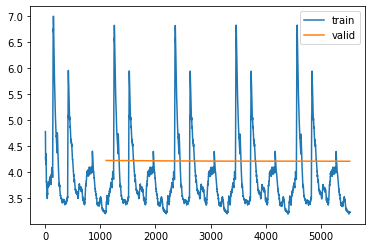

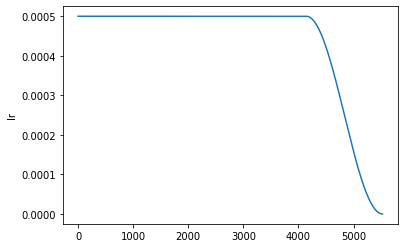

In [ ]:
learn.fit_flat_cos(5,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

## Interperation

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,-0.03333334,-0.03333334,-1.4166666,2.0,-2.0,1.2916666
theta_0_std,0.19928952,0.19928952,0.9186793,0.0,0.0,0.9666422
theta_1_mean,-0.0033333336,-0.019999994,0.3125,-0.99999064,1.0,0.083333336
theta_1_std,0.019928953,0.0,0.46841744,5.2859377e-05,0.0,0.2793102
theta_2_mean,0.0,-0.001999999,0.0,0.0,-0.5,0.0
theta_2_std,0.0,0.0,0.0,0.0,0.0,0.0
att_mean,0.666667,0.749998,0.340278,0.5,0.6,0.163194
att_std,0.471405,0.433012,0.473802,0.5,0.489898,0.369543
theta_3_mean,NaN,0.0,NaN,0.0,0.0,0.16666667
theta_3_std,NaN,0.0,NaN,0.0,0.0,0.5586204


In [ ]:
# hide
from fastai.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
# hide
interp = NBeatsInterpretation.from_learner(learn)

RuntimeError: The size of tensor a (35) must match the size of tensor b (0) at non-singleton dimension 2

In [ ]:
# hide
interp.plot_top_losses(3, combine_stack=True)